<h1>Ngẫu hứng chiều mưa</h1>

Tình cờ xem một video chỉnh sửa ảnh trên phây bốc riu, editor trong video đang lọc một cái cây ra khỏi khung trời của nó, giống như ảnh sau

<img src="471812.jpg">

Biến thành ảnh như sau

<img src="471812_filtered.jpg">

Bài viết này sẽ trình bày ngắn ngọn các lọc 2 cái cây và bãi cỏ ra khỏi khung hình bằng thuật toán KMeans

Bắt đầu thì mình sẽ khai báo thư viện liên quan và đọc ảnh lên

In [1]:
import numpy as np
import pandas as pd
import cv2

In [2]:
image = cv2.imread("blur/471812.jpg")
cv2.imshow("", image)
cv2.waitKey(0)

-1

Đã đọc ảnh xong rồi thì giờ mình chuyển ảnh ba chiều thành 2 chiều, gộp chiều dài và rộng lại, giữ nguyên phần kênh màu

In [3]:
flattened_image = image.reshape(image.shape[0]*image.shape[1], 3)

<i>image.shape[0] là chiều dài, image.shape[1] là chiều rộng, số 3 chính là kênh màu</i>

Khai báo KMeans, chọn số clusters là 3, vì nhìn vào hình theo cảm quan thì mình xác định có 3 nhóm màu chính là lục, lam và trắng

Tiến hành luôn phần fit tấm ảnh

**Lưu ý: Phần code chỉ dùng cho tấm ảnh trình bày ở đầu bài viết

In [4]:
from sklearn.cluster import KMeans

In [5]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(flattened_image)

Lấy phần kết quả dự đoán từng cụm

In [6]:
prediction = kmeans.predict(flattened_image)

Giải thuật KMeans có kết quả theo tọa độ 3 kênh màu và có số trung tâm tìm được bằng với số cụm (ở đây là 3 cụm). Kết quả có dạng số thập phân nên ở đây tiến hành làm tròn đưa về số tự nhiên.

In [7]:
centers = kmeans.cluster_centers_.round()

In [8]:
centers

array([[222., 118.,  17.],
       [ 37., 133.,  66.],
       [233., 211., 184.]])

Tới đây, mình đặt ra một câu hỏi "Gồi dờ biếc cụm nào là cái cây vdà bãi cỏ ?", câu trả lời đơn giản là mình kiểm tra thủ công luôn :D , hơi quê mà chỉ có 3 cụm điểm nên làm tay cho gọn !!!

Cách đơn giản là mình viết một cái hàm truyền vào một bộ 3 màu rồi hiển thị màu này lên là biết chọn cái centers nào liền !!!

Còn về phần nội dung hàm thì phiền người đọc tự xem code ở dưới giúp Hào nhe :D

In [11]:
def check_color(colors):
    import matplotlib.pyplot as plt
    n = 16
    def create_color_image(colors):
        img = np.zeros((n*n,3));
        img[:] = colors;
        return img.reshape(n,n,3).astype(int);
    img = create_color_image(colors);
    plt.imshow(img)
    plt.show()
    return;

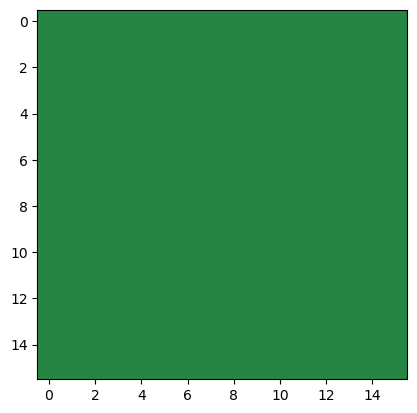

In [12]:
check_color(centers[1])

Chọn được màu lục là của center thứ 1

Mượn pandas để xử lý cho dễ phần đánh dấu điểm ảnh sẽ biến đổi

In [13]:
df = pd.DataFrame(flattened_image, columns=['B', 'G', 'R'])

Đánh dấu bằng biến prediction đã tạo ở trên

In [14]:
df['cluster']=prediction

Nếu là cụm 1 thì để nguyên, còn lại thì đưa về màu trắng hết !!! Tức là 255, 255, 255

In [15]:
df.loc[df.cluster!=1, ['B', 'G', 'R']] = [255, 255, 255]

Giờ là lúc gặt hái thành quả sau khi biến đổi lòng vòng nảy giờ

In [18]:
flattened_image = df[['B', 'G', 'R']].values.reshape(image.shape)

In [19]:
cv2.imshow("", flattened_image)
cv2.waitKey(0)

-1

Cảm ơn độc giả đã xem !!!

Sài Gòn - Thủ Đức, chiều mưa bụng đói cồn cào !!!